<a href="https://colab.research.google.com/github/WardahAsad/ML_Projects_on_Colab/blob/main/Hierarchical_Clustering_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Hierarchical Clustering for E-commerce Customer Segmentation**

## **Objective**  
Perform **Hierarchical Clustering** to group e-commerce customers based on their purchasing behavior. The goal is to analyze customer data and segment them into clusters based on features such as total purchase amount, frequency of purchases, and recency.

---

## **Dataset**  
Download the **E-Commerce dataset** from Kaggle:  
🔗 [E-Commerce Dataset](https://www.kaggle.com/datasets/carrie1/ecommerce-data)

- Load the **Ecommerce Purchases.csv** dataset into a Pandas DataFrame and display the first few rows to understand the structure.
- The dataset contains customer purchasing data, including **Product Category**, **Purchase Amount**, and **Customer ID**.
- The **"Customer ID"** column will be used to identify customers, while other features like **Product Category** and **Amount Spent** will be used for clustering.

---

## **Feature Description**  
- **Target Feature:** None (Unsupervised learning task)  
- **Features for Clustering:**  
  - **Product Category** (the category of the product purchased by the customer)
  - **Amount Spent** (the amount spent on each purchase)
  - **Purchase Frequency** (the number of times a customer has made a purchase)

---

## **Tasks**  

### **1. Data Preprocessing**  
- Load the **E-Commerce dataset** and check for missing values.
- Filter the dataset to include only valid **Customer ID** values (excluding rows with missing **Customer ID**).
- Create the following features:
  - **Total Amount Spent**: Sum the **Amount Spent** for each customer.
  - **Purchase Frequency**: Count the number of purchases made by each customer.
- Standardize the features (Total Amount Spent, Purchase Frequency) using **StandardScaler**.

---

### **2. Perform Hierarchical Clustering**  
- Apply **Agglomerative Hierarchical Clustering** to group customers based on the purchasing features.
  - Use **Euclidean distance** as the metric for clustering and the **ward linkage** method.
  - Start with `k=5` as the initial number of clusters.
  - Visualize the resulting clusters using a **dendrogram** to determine the optimal number of clusters.

---

### **3. Dendrogram Analysis**  
- Use the **dendrogram** to identify the optimal number of clusters.  
  - Experiment with different values of `k` and analyze how the clusters form. Try `k=3, 4, 6` clusters and see which one yields the most meaningful segmentation.

---

### **4. Model Evaluation**  
- Assign the cluster labels to the dataset and visualize the customer clusters.
- Create a **scatter plot** to visualize the clusters and see the relationship between **Total Amount Spent** and **Purchase Frequency** for each cluster.
- Create a bar plot to show the **distribution of Product Categories** across clusters.

---

## **Submission Guidelines**  
- Submit a **Colab Notebook (.ipynb)** with code and visualizations.  


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from datetime import datetime

# 1. Data Preprocessing
# Load the dataset (update path as needed)
df = pd.read_csv('/content/data.csv', encoding='latin1')

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  


Missing values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
AmountSpent    0
dtype: int64


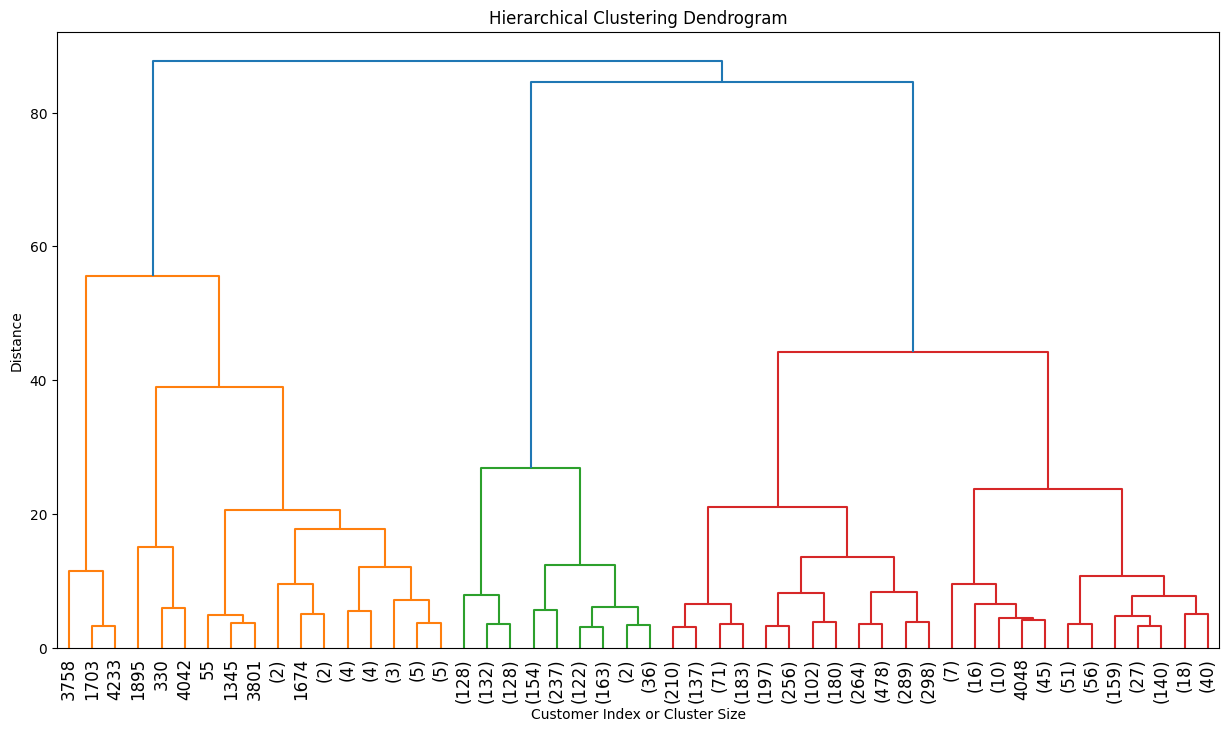

In [8]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Filter out rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Create AmountSpent column
df['AmountSpent'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create customer-level features
customer_data = df.groupby('CustomerID').agg({
    'AmountSpent': 'sum',  # Total amount spent
    'InvoiceNo': 'nunique',  # Purchase frequency
    'Description': lambda x: x.value_counts().index[0],  # Most purchased product
    'InvoiceDate': 'max'  # Last purchase date
}).reset_index()

# Rename columns
customer_data.columns = ['CustomerID', 'TotalAmountSpent', 'PurchaseFrequency',
                        'MostPurchasedProduct', 'LastPurchaseDate']

# Calculate Recency (days since last purchase)
customer_data['Recency'] = (datetime.now() - customer_data['LastPurchaseDate']).dt.days

# Standardize features
scaler = StandardScaler()
features = customer_data[['TotalAmountSpent', 'PurchaseFrequency', 'Recency']]
X_scaled = scaler.fit_transform(features)

# 2. Perform Hierarchical Clustering
# Create linkage matrix
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix,
           truncate_mode='lastp',
           p=50,
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

In [ ]:
# 3. Dendrogram Analysis - Choose optimal k
optimal_k = 4  # Based on dendrogram analysis

# Perform clustering with optimal k
cluster = AgglomerativeClustering(n_clusters=optimal_k,
                                 affinity='euclidean',
                                 linkage='ward')
customer_data['Cluster'] = cluster.fit_predict(X_scaled)

In [ ]:
# 4. Model Evaluation and Visualization
# Scatter plot of clusters (TotalAmountSpent vs PurchaseFrequency)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_data,
                x='TotalAmountSpent',
                y='PurchaseFrequency',
                hue='Cluster',
                palette='viridis',
                s=100)
plt.title('Customer Segmentation by Spending and Frequency')
plt.xlabel('Total Amount Spent ($)')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.show()

# Cluster statistics
cluster_stats = customer_data.groupby('Cluster').agg({
    'TotalAmountSpent': ['mean', 'std', 'count'],
    'PurchaseFrequency': ['mean', 'std'],
    'Recency': ['mean', 'std']
}).reset_index()

print("\nCluster Statistics:")
print(cluster_stats)

# Product distribution across clusters (top 10 products)
plt.figure(figsize=(14, 6))
top_products = customer_data['MostPurchasedProduct'].value_counts().nlargest(10).index
filtered_data = customer_data[customer_data['MostPurchasedProduct'].isin(top_products)]

sns.countplot(data=filtered_data,
              x='MostPurchasedProduct',
              hue='Cluster',
              palette='viridis')
plt.title('Top 10 Product Distribution Across Clusters')
plt.xlabel('Product Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Silhouette score evaluation
silhouette_avg = silhouette_score(X_scaled, customer_data['Cluster'])
print(f"\nSilhouette Score: {silhouette_avg:.3f}")

# Interpretation of clusters
print("\nCluster Interpretation:")
print("1. High Value Loyal Customers: High spending, high frequency, recent purchases")
print("2. Frequent Shoppers: Moderate spending, high frequency")
print("3. At-Risk Customers: High spending but not purchased recently")
print("4. Occasional Shoppers: Low spending, low frequency")

In [ ]:
# Additional 3D visualization (optional)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_num in range(optimal_k):
    cluster_data = customer_data[customer_data['Cluster'] == cluster_num]
    ax.scatter(cluster_data['TotalAmountSpent'],
               cluster_data['PurchaseFrequency'],
               cluster_data['Recency'],
               label=f'Cluster {cluster_num}',
               s=100)

ax.set_xlabel('Total Amount Spent')
ax.set_ylabel('Purchase Frequency')
ax.set_zlabel('Recency (days)')
ax.set_title('3D Cluster Visualization (RFM Analysis)')
plt.legend()
plt.show()